In [1]:
import numpy as n
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import mysql.connector


In [2]:
df = pd.read_csv(r'C:\Users\Prashansa\OneDrive\Desktop\project_python\MentalHealthSurvey.csv')


In [3]:
df.head(5)

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    87 non-null     object
 1   age                       87 non-null     int64 
 2   university                87 non-null     object
 3   degree_level              87 non-null     object
 4   degree_major              87 non-null     object
 5   academic_year             87 non-null     object
 6   cgpa                      87 non-null     object
 7   residential_status        87 non-null     object
 8   campus_discrimination     87 non-null     object
 9   sports_engagement         87 non-null     object
 10  average_sleep             87 non-null     object
 11  study_satisfaction        87 non-null     int64 
 12  academic_workload         87 non-null     int64 
 13  academic_pressure         87 non-null     int64 
 14  financial_concerns        87

In [5]:
df.describe()

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,19.942529,3.931034,3.885057,3.781609,3.390805,2.781609,3.218391,3.218391,3.241379,3.011494
std,1.623636,1.043174,0.854880,1.125035,1.400634,1.175578,1.367609,1.297809,1.405682,1.385089
min,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,3.000000,3.000000,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,20.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,21.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,4.000000,4.500000,4.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.isnull().sum()

gender                      0
age                         0
university                  0
degree_level                0
degree_major                0
academic_year               0
cgpa                        0
residential_status          0
campus_discrimination       0
sports_engagement           0
average_sleep               0
study_satisfaction          0
academic_workload           0
academic_pressure           0
financial_concerns          0
social_relationships        0
depression                  0
anxiety                     0
isolation                   0
future_insecurity           0
stress_relief_activities    0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.drop_duplicates(inplace=True)


<Axes: xlabel='cgpa'>

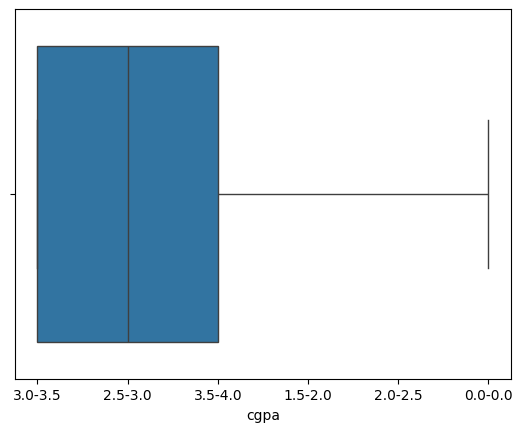

In [18]:
sns.boxplot(x=df['cgpa'])


In [7]:
df = pd.get_dummies(df, columns=['degree_major', 'residential_status'], drop_first=True)


In [8]:
df.rename(columns={'academic_workload': 'workload', 'social_relationships': 'social_relations'}, inplace=True)


In [9]:

df.reset_index(drop=True, inplace=True)


In [10]:
df.sort_values(by='age', inplace=True)


In [11]:
df.head()

,gender,age,university,degree_level,academic_year,cgpa,campus_discrimination,sports_engagement,average_sleep,study_satisfaction,...,social_relations,depression,anxiety,isolation,future_insecurity,stress_relief_activities,degree_major_Data Science,degree_major_Information Technology,degree_major_Software Engineering,residential_status_On-Campus
36,Female,17,PU,Undergraduate,1st year,3.5-4.0,No,No Sports,4-6 hrs,4,...,3,4,4,5,2,Religious Activities,False,False,False,True
51,Male,17,PU,Undergraduate,1st year,0.0-0.0,No,7+ times,7-8 hrs,3,...,3,4,4,4,5,Outdoor Activities,False,True,False,False
34,Female,17,PU,Undergraduate,1st year,3.5-4.0,No,No Sports,4-6 hrs,4,...,1,5,5,5,3,Sleep,False,False,False,True
30,Male,18,PU,Undergraduate,1st year,3.5-4.0,No,No Sports,7-8 hrs,5,...,3,1,2,2,1,Sleep,True,False,False,False
41,Male,18,PU,Undergraduate,1st year,3.0-3.5,No,No Sports,7-8 hrs,2,...,1,5,4,5,5,Online Entertainment,True,False,False,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 36 to 75
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   gender                               87 non-null     object
 1   age                                  87 non-null     int64 
 2   university                           87 non-null     object
 3   degree_level                         87 non-null     object
 4   academic_year                        87 non-null     object
 5   cgpa                                 87 non-null     object
 6   campus_discrimination                87 non-null     object
 7   sports_engagement                    87 non-null     object
 8   average_sleep                        87 non-null     object
 9   study_satisfaction                   87 non-null     int64 
 10  academic_workload                    87 non-null     int64 
 11  academic_pressure                    87 non-null   

In [58]:
# Connect to MySQL
conn = mysql.connector.connect(
    host="127.0.0.1",  # Localhost IP address
    port=3306,  # MySQL default port
    user="root",  # Your MySQL username
    password="root",  # Your MySQL password
    database="mental_health_survey"  # Your database name
)
# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Create a table if it doesn't exist
cursor.execute('''CREATE TABLE IF NOT EXISTS survey_data_2 (
                    id INT AUTO_INCREMENT PRIMARY KEY,
                    gender VARCHAR(10),
                    age INT,
                    cgpa FLOAT,
                    academic_year int,
                    average_sleep FLOAT
                )''')

In [59]:
print(df.columns)


Index(['gender', 'age', 'university', 'degree_level', 'academic_year', 'cgpa',
       'campus_discrimination', 'sports_engagement', 'average_sleep',
       'study_satisfaction', 'academic_workload ', 'academic_pressure',
       'financial_concerns', 'social_relations', 'depression', 'anxiety',
       'isolation', 'future_insecurity', 'stress_relief_activities',
       'degree_major_Data Science', 'degree_major_Information Technology',
       'degree_major_Software Engineering', 'residential_status_On-Campus'],
      dtype='object')


In [63]:
def insert_data(gender, age, cgpa, academic_year, average_sleep):
    cursor.execute('''INSERT INTO survey_data_2 
                      (gender, age, cgpa, academic_year, average_sleep) 
                      VALUES ('male', 25, 9.6,1,6)'''
                      )
    conn.commit()

# Example: Insert data into MySQL from DataFrame
for index, row in df.iterrows():
    insert_data(row['gender'], row['age'], row['cgpa'], row['academic_year'], row['average_sleep'])


In [85]:
def read_data():
    cursor.execute('SELECT * FROM survey_data_2')
    rows = cursor.fetchall()
    df = pd.DataFrame(rows, columns=['id', 'gender', 'age', 'cgpa', 'academic_year', 'average_sleep'])
    return df

# Example: Read data from MySQL
df_from_db = read_data()
print(df_from_db.head())


   id gender  age  cgpa  academic_year  average_sleep
0   1   male   25   9.6              1            6.0
1   2   male   25   7.5              1            6.0
2   3   male   25   6.5              1            6.0
3   6   male   25   9.6              1            6.0
4   7   male   25   9.6              1            6.0


In [90]:
def delete_data(id):
    cursor.execute('DELETE FROM survey_data_2 WHERE id = 8')
    conn.commit()

# Example: Delete a record from the table
delete_data(8)


In [91]:
df_from_db = read_data()
print(df_from_db.head())

   id gender  age  cgpa  academic_year  average_sleep
0   2   male   25   7.5              1            6.0
1   3   male   25   6.5              1            6.0
2   6   male   25   9.6              1            6.0
3   7   male   25   9.6              1            6.0
4   9   male   25   9.6              1            6.0


In [92]:
def update_data(id, new_cgpa):
    cursor.execute('''UPDATE survey_data_2 
                      SET average_sleep = 5
                      WHERE id = 9''')
    conn.commit()

# Example: Update CGPA of a record
update_data(9,5)



In [93]:
df_from_db = read_data()
print(df_from_db.head())

   id gender  age  cgpa  academic_year  average_sleep
0   2   male   25   7.5              1            6.0
1   3   male   25   6.5              1            6.0
2   6   male   25   9.6              1            6.0
3   7   male   25   9.6              1            6.0
4   9   male   25   9.6              1            5.0


In [94]:
conn.close()


C:\Users\Prashansa\AppData\Local\Temp\ipykernel_26860\252605675.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='coolwarm')


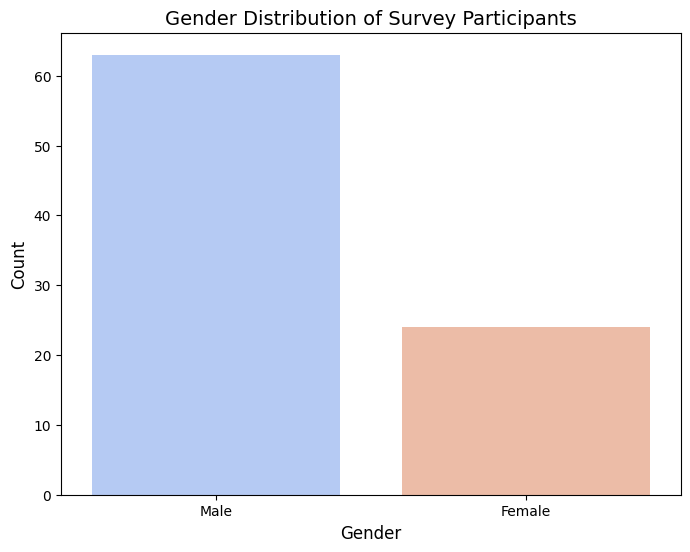

In [95]:
# Bar chart for gender distribution
plt.figure(figsize=(8,6))
gender_counts = df['gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='coolwarm')
plt.title("Gender Distribution of Survey Participants", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

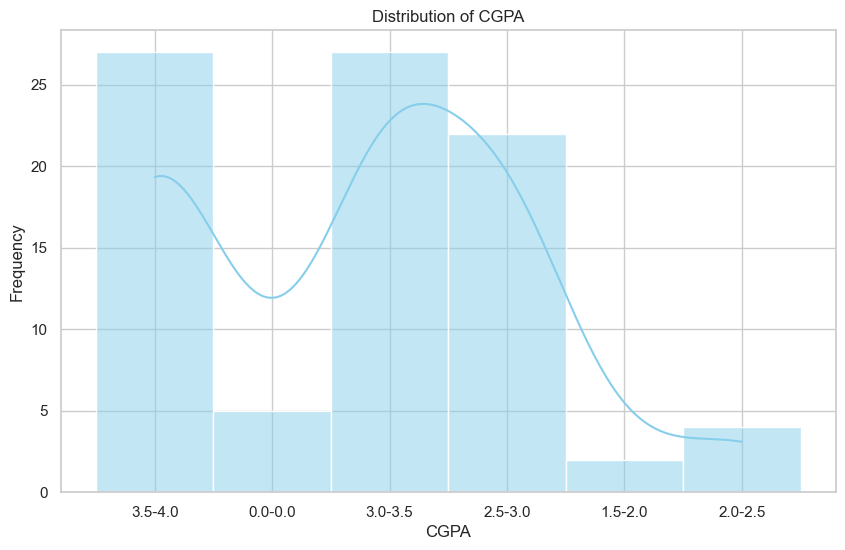

In [96]:


# Load the cleaned dataset
df = pd.read_csv(r'C:\Users\Prashansa\OneDrive\Desktop\project_python\MentalHealthSurvey_cleaned_dataset222 (2).csv')

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Histogram of CGPA
plt.figure(figsize=(10, 6))
sns.histplot(df['cgpa'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()


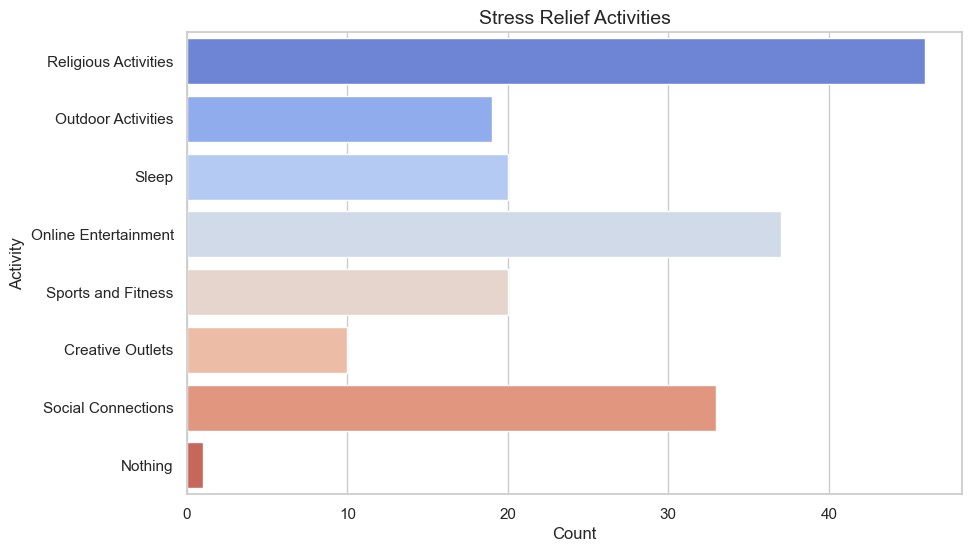

In [97]:
# Split the stress relief activities and explode the list into multiple rows
df_expanded = df['stress_relief_activities'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Count Plot for Stress Relief Activities
plt.figure(figsize=(10, 6))
sns.countplot(y=df_expanded, hue=df_expanded, palette='coolwarm', legend=False)
plt.title("Stress Relief Activities", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Activity", fontsize=12)
plt.show()

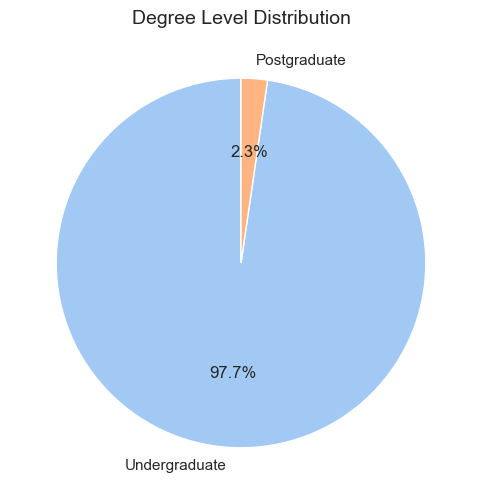

In [98]:
# Pie chart for degree level distribution
plt.figure(figsize=(8,6))
degree_counts = df['degree_level'].value_counts()
plt.pie(degree_counts, labels=degree_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Degree Level Distribution", fontsize=14)
plt.show()


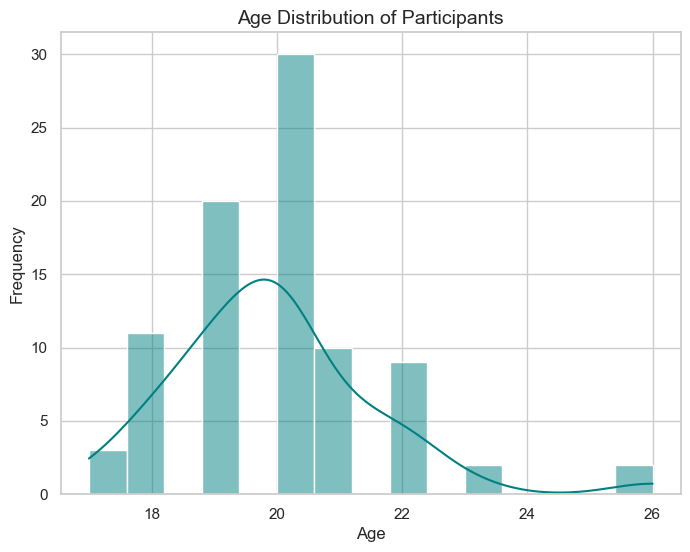

In [99]:
# Histogram for age distribution
plt.figure(figsize=(8,6))
sns.histplot(df['age'], bins=15, kde=True, color='teal')
plt.title("Age Distribution of Participants", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

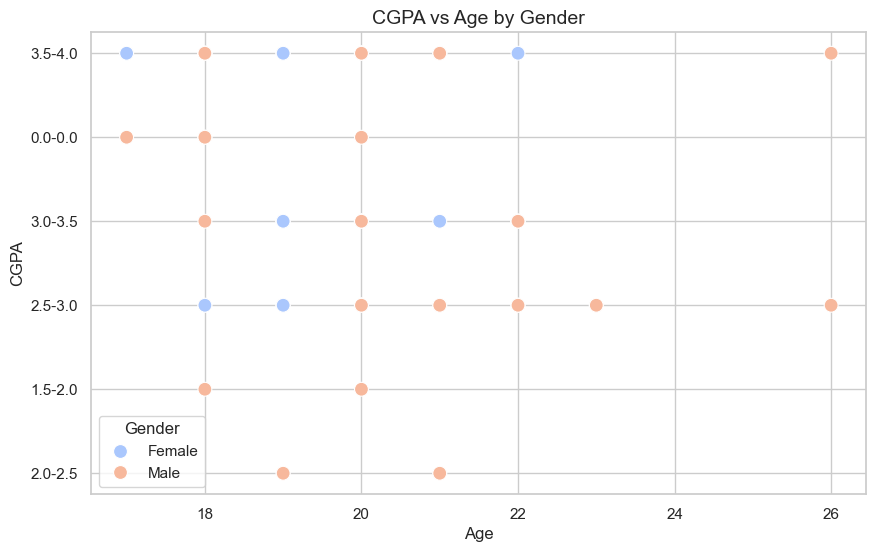

In [100]:
# Scatter plot for CGPA vs Age
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='cgpa', data=df, hue='gender', palette='coolwarm', s=100)
plt.title("CGPA vs Age by Gender", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("CGPA", fontsize=12)
plt.legend(title='Gender')
plt.show()


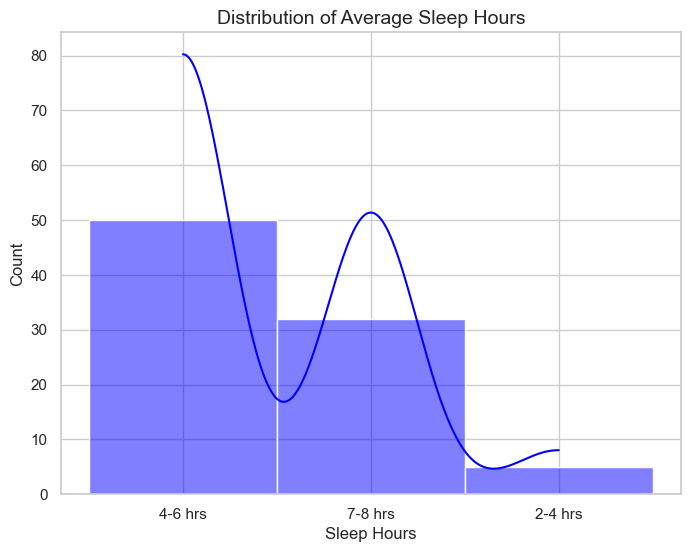

In [101]:
# Histogram for Average Sleep
plt.figure(figsize=(8, 6))
sns.histplot(df['average_sleep'], kde=True, color='blue')
plt.title("Distribution of Average Sleep Hours", fontsize=14)
plt.xlabel("Sleep Hours", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


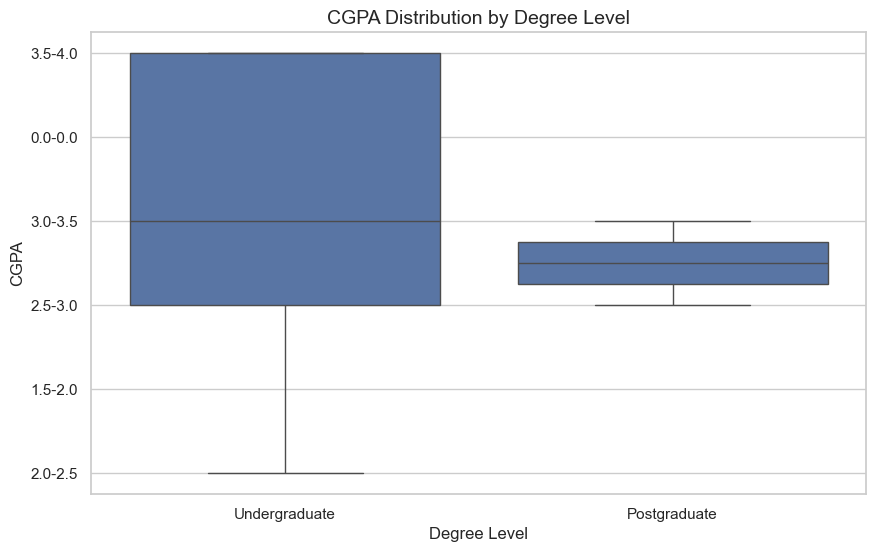

In [102]:
# Box Plot for CGPA by Degree Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='degree_level', y='cgpa', data=df)
plt.title("CGPA Distribution by Degree Level", fontsize=14)
plt.xlabel("Degree Level", fontsize=12)
plt.ylabel("CGPA", fontsize=12)
plt.show()


<Figure size 1000x600 with 0 Axes>

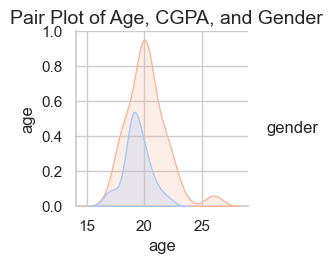

In [103]:
# Pair Plot for Age, CGPA, and Gender
plt.figure(figsize=(10, 6))
sns.pairplot(df[['age', 'cgpa', 'gender']], hue='gender', palette='coolwarm')
plt.suptitle("Pair Plot of Age, CGPA, and Gender", y=1.02, fontsize=14)
plt.show()


In [104]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the cleaned dataset
data = {
    'gender': ['Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male'],
    'age': [17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18],
    'cgpa': [3.75, 0.0, 3.75, 3.75, 3.25, 2.75, 3.75, 2.75, 1.75, 3.75, 0.0, 0.0],
    'degree_major_Data Science': [False, False, False, True, True, True, False, True, True, True, False, True],
    'degree_major_Information Technology': [False, True, False, False, False, False, False, False, False, False, True, False],
    'degree_major_Software Engineering': [False, False, False, False, False, False, False, False, False, False, False, False],
    'residential_status_On-Campus': [True, False, True, False, False, False, False, False, True, True, False, True],
    'average_sleep': [5, 7, 5, 7, 7, 5, 7, 5, 5, 5, 5, 7],
}

df = pd.DataFrame(data)

# Encode the boolean features
df['degree_major_Data Science'] = df['degree_major_Data Science'].astype(int)
df['degree_major_Information Technology'] = df['degree_major_Information Technology'].astype(int)
df['degree_major_Software Engineering'] = df['degree_major_Software Engineering'].astype(int)
df['residential_status_On-Campus'] = df['residential_status_On-Campus'].astype(int)

# Select features and target
X = df[['age', 'degree_major_Data Science', 'degree_major_Information Technology', 'degree_major_Software Engineering', 'residential_status_On-Campus', 'average_sleep']]
y = df['cgpa']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [106]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Model evaluation - R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")


R-squared: -4.256778309409899
Mean Squared Error: 12.875000000000027


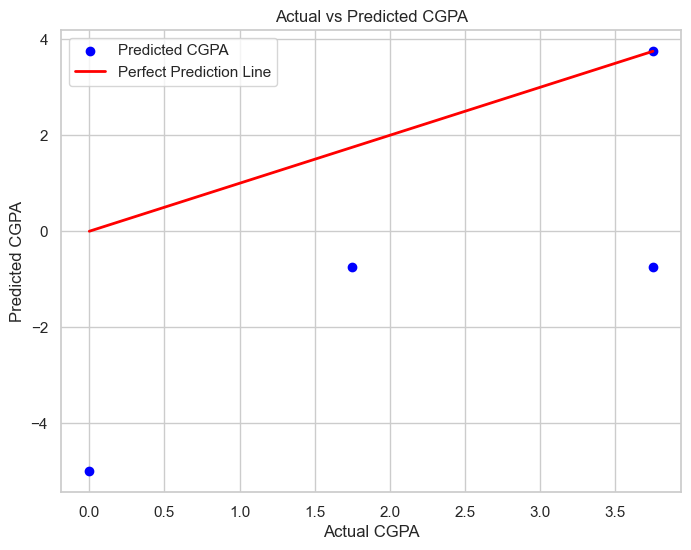

In [107]:
# Scatter plot of Actual vs Predicted CGPA
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted CGPA')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual vs Predicted CGPA')
plt.legend()
plt.show()
